-

logistic regression 3-class classifier

code documentation:
https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html

-

phase flag

mgwa -> 0 

mgri -> 1 

mgpv -> 2



In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'arial'

In [3]:
print(__doc__)

# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import preprocessing

from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve

from tqdm import tqdm 

import warnings
warnings.filterwarnings('ignore')

Automatically created module for IPython interactive environment


In [4]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

## Import data

In [7]:
#fo100_data = pd.read_csv('/Users/dong2j/Dropbox/H_MTZ/results/hefesto-mg2so4/mg2sio4-ver270914/fort.66',delim_whitespace=True)

In [8]:
fo100_data.head()

NameError: name 'fo100_data' is not defined

In [10]:
# control = pd.read_csv(('/Users/dong2j/Dropbox/H_MTZ/results/hefesto-mg2so4/mg2sio4-ver270914/control'),header = None)

In [12]:
# p_min = int(control[0][0])
# p_max = int(control[1][0])
# p_res = int(control[2][0])

In [14]:
# t_min = int(control[3][0])
# t_max = int(control[4][0])
# t_res = int(control[2][0])

In [16]:
minerals = fo100_data.values[:,3:]
minerals_array = {}
nall = len(minerals)
nrow = int(p_res)+1
ncut = int(nall/nrow)
for x in range(0, len(minerals[0])):
    minerals_array[x] = minerals[:,x].reshape(ncut,nrow)
    
# make TP meshgrid:
plist = np.linspace(0,30,nrow)
tlist = np.linspace(200,3000,ncut)

pp, tt = np.meshgrid(plist,tlist)

NameError: name 'fo100_data' is not defined

NameError: name 'minerals' is not defined

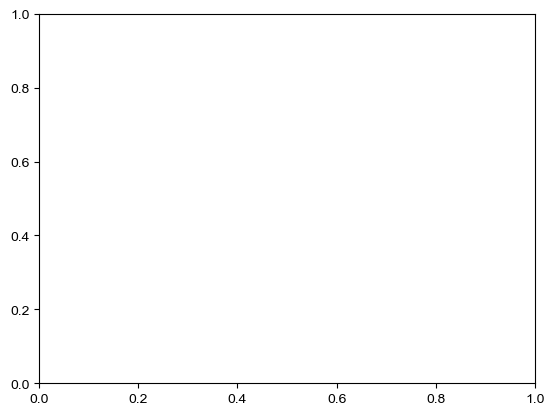

In [18]:
# Produce figure using PT meshgrid:
fig,ax = plt.subplots()

for x in range(0, len(minerals[0])):
    plt.contour(pp,tt,minerals_array[x],[1], 
            colors = 'b',
            linewidths = 1)

ax.tick_params(labelsize=12)
ax.minorticks_on()
# ax.set_xticks([5,10,15,20, 25])
# ax.set_yticks([1600,2000,2400,2800])
ax.set_title('Mg2SiO4')
ax.tick_params(direction='out')
ax.set_xlim(10,30)
ax.set_ylim(300,2800)
ax.set_xlabel('Pressure (GPa)',fontsize=12)
ax.set_ylabel('Temperature (K)',fontsize=12)

fig.savefig('mg2sio4.pdf', bbox_inches = "tight")

In [20]:
# therm1 = pd.read_csv('adiabat1600.csv', header=None)
# adiabat1 = therm1.values
# t_adiabat1 = adiabat1[:,0]
# p_adiabat1 = adiabat1[:,1]
# d_adiabat1 = adiabat1[:,2]

In [22]:
label_nums = {"phase":{"wd": 0, "rw": 1, "bdg": 2}}

In [24]:
pd_data_d1 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D1/pressure/d1-w-temp-vol-p-phase.csv",header=0)
pd_data_d1 = pd_data_d1.replace(label_nums)
pd_data_d1 = pd_data_d1[['p_w','temp','phase']]
pd_data_d1 = pd_data_d1.rename(columns={'p_w':'P','temp':'T','phase':'Phase'})

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D1/pressure/d1-w-temp-vol-p-phase.csv'

In [ ]:
pd_data_d2_s1 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D2-s1/pressure/d2-s1-w-temp-vol-p-phase.csv",header=0)
pd_data_d2_s1 = pd_data_d2_s1.replace(label_nums)
pd_data_d2_s1 = pd_data_d2_s1[['p_w','temp','phase']]
pd_data_d2_s1 = pd_data_d2_s1.rename(columns={'p_w':'P','temp':'T','phase':'Phase'})

In [27]:
pd_data_d2_s2 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D2-s2/pressure/d2-s2-w-temp-vol-p-phase.csv",header=0)
pd_data_d2_s2 = pd_data_d2_s2.replace(label_nums)
pd_data_d2_s2 = pd_data_d2_s2[['p_w','temp','phase']]
pd_data_d2_s2 = pd_data_d2_s2.rename(columns={'p_w':'P','temp':'T','phase':'Phase'})

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D2-s2/pressure/d2-s2-w-temp-vol-p-phase.csv'

In [29]:
pd_data_d2_s3 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D2-s3/pressure/d2-s3-w-temp-vol-p-phase.csv",header=0)
pd_data_d2_s3 = pd_data_d2_s3.replace(label_nums)
pd_data_d2_s3 = pd_data_d2_s3[['p_w','temp','phase']]
pd_data_d2_s3 = pd_data_d2_s3.rename(columns={'p_w':'P','temp':'T','phase':'Phase'})

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D2-s3/pressure/d2-s3-w-temp-vol-p-phase.csv'

In [31]:
pd_data_d3_s1 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D3-s1/pressure/d3-s1-w-temp-vol-p-phase.csv",header=0)
pd_data_d3_s1 = pd_data_d3_s1.replace(label_nums)
pd_data_d3_s1 = pd_data_d3_s1[['p_w','temp','phase']]
pd_data_d3_s1 = pd_data_d3_s1.rename(columns={'p_w':'P','temp':'T','phase':'Phase'})
# # intereting first bdg

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D3-s1/pressure/d3-s1-w-temp-vol-p-phase.csv'

In [33]:
pd_data_d3_s2 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D3-s2/pressure/d3-s2-w-temp-vol-p-phase.csv",header=0)
pd_data_d3_s2 = pd_data_d3_s2.replace(label_nums)
pd_data_d3_s2 = pd_data_d3_s2[['p_w','temp','phase']]
pd_data_d3_s2 = pd_data_d3_s2.rename(columns={'p_w':'P','temp':'T','phase':'Phase'})

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D3-s2/pressure/d3-s2-w-temp-vol-p-phase.csv'

In [35]:
# pd_data_d3_s3 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D3-s3/pressure/d3-s3-w-temp-vol-p-phase.csv",header=0)
# pd_data_d3_s3 = pd_data_d3_s3.replace(label_nums)
# pd_data_d3_s3 = pd_data_d3_s3[['p_w','temp','phase']]
# pd_data_d3_s3 = pd_data_d3_s3.rename(columns={'p_w':'P','temp':'T','phase':'Phase'})

In [37]:
pd_data_d5_s1 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D5-s1/pressure/d5-s1-w-temp-vol-p-phase.csv",header=0)
pd_data_d5_s1 = pd_data_d5_s1.replace(label_nums)
pd_data_d5_s1 = pd_data_d5_s1[['p_w','temp','phase']]
pd_data_d5_s1 = pd_data_d5_s1.rename(columns={'p_w':'P','temp':'T','phase':'Phase'})

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D5-s1/pressure/d5-s1-w-temp-vol-p-phase.csv'

In [39]:
pd_data_d5_s2 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D5-s2/pressure/d5-s2-w-temp-vol-p-phase.csv",header=0)
pd_data_d5_s2 = pd_data_d5_s2.replace(label_nums)
pd_data_d5_s2 = pd_data_d5_s2[['p_w','temp','phase']]
pd_data_d5_s2 = pd_data_d5_s2.rename(columns={'p_w':'P','temp':'T','phase':'Phase'})

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dong2j/Dropbox/H_MTZ/processed-data-2020/D5-s2/pressure/d5-s2-w-temp-vol-p-phase.csv'

In [41]:

#pb_data_dong = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data_mg2sio4.csv",header=0)

In [43]:
pb_data_dong =  pd.concat([pd_data_d1, 
                           pd_data_d2_s1, pd_data_d2_s2, pd_data_d2_s3,
                          pd_data_d5_s1, pd_data_d5_s2])

NameError: name 'pd_data_d1' is not defined

In [45]:
#pb_data_dong = pb_data_dong[(pb_data_dong['T']>=1600)]

test pb_data_dong[(pb_data_dong['T']>=1600)&(pb_data_dong['T']<=2400)]
not great, not enough constraint at high T

In [48]:
pb_data_k03 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data-mg2sio4-k03-corrected.csv",header=0)
pb_data_k04 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data-mg2sio4-k04-rw-corrected.csv",header=0)
pb_data_k09_pv = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data-mg2sio4-k09-pv-corrected.csv",header=0)
pb_data_k09_wd = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data-mg2sio4-k09-wd-corrected.csv",header=0)
pb_data_i06 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data-mg2sio4-i06-corrected.csv",header=0)
#pb_data_s00 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data_mg2sio4_s00.csv",header=0)
pb_data_s01 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data-mg2sio4-s01-corrected.csv",header=0)
pb_data_i98 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data-mg2sio4-i98-corrected.csv",header=0)
pb_data_g13 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data-mg2sio4-g13-corrected.csv",header=0)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dong2j/Dropbox/H_MTZ/pb/data-mg2sio4-k03-corrected.csv'

In [50]:
# pb_data_f04 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data_mg2sio4_f04.csv",header=0)
# pb_data_h01 = pd.read_csv("/Users/dong2j/Dropbox/H_MTZ/pb/data_mg2sio4_h01.csv",header=0)

In [52]:
frames = [pb_data_i06,pb_data_k04,pb_data_dong,pb_data_k09_wd]
frames_old = [pb_data_i06,pb_data_k04,pb_data_dong,pb_data_k09_wd]
              
              #[pb_data_g13, pb_data_s00, pb_data_i98, pb_data_s01,pb_data_i06,pb_data_k09_wd, pb_data_k04, pb_data_k09_pv] #pb_data_k09_pv, pb_data_k09_wd, pb_data_k04

NameError: name 'pb_data_i06' is not defined

In [54]:
for f in frames:
    print(len(f))

NameError: name 'frames' is not defined

In [56]:
# frames = [pb_data_g13, pb_data_i06, pb_data_k03,pb_data_dong]
# frames_old = [pb_data_g13, pb_data_k03, pb_data_i06]

In [58]:
plt.scatter(pb_data_i98['P'],pb_data_i98['T'])

NameError: name 'pb_data_i98' is not defined

In [60]:
pb_data_0 = pd.concat(frames)
pb_data_1 = pd.concat(frames_old)

NameError: name 'frames' is not defined

In [62]:
pb_data = pb_data_0[(pb_data_0['T']>=1500)]

NameError: name 'pb_data_0' is not defined

In [64]:
pb_data.groupby('Phase').count()

NameError: name 'pb_data' is not defined

In [67]:
data = pd.read_csv('data_h2o_all.csv')

In [69]:
neptune = pd.read_csv('/Users/dong2j/Dropbox/ML_phase_diagram/H2O/neptune.csv')
uranus = pd.read_csv('/Users/dong2j/Dropbox/ML_phase_diagram/H2O/uranus.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/dong2j/Dropbox/ML_phase_diagram/H2O/neptune.csv'

In [71]:
data

,P (GPa),T (K),Phase,Ref,Method,Comment,w/o thermal P
0,2.750,93.00,ice-VIII,NaN,NaN,NaN,NaN
1,4.830,93.00,ice-VIII,NaN,NaN,NaN,NaN
2,7.390,93.00,ice-VIII,NaN,NaN,NaN,NaN
3,11.480,93.00,ice-VIII,NaN,NaN,NaN,NaN
4,3.000,196.00,ice-VIII,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
685,0.206,219.75,Ice II,NaN,NaN,NaN,NaN
686,0.208,218.65,Ice II,NaN,NaN,NaN,NaN
687,0.196,236.25,Ice II,NaN,NaN,NaN,NaN
688,0.200,237.45,Ice II,NaN,NaN,NaN,NaN


In [73]:
data['Phase'].unique()

array(['ice-VIII', 'Ice-Ih', 'liquid', 'Ice III', 'Ice V', 'Ice VI',
       'ice-VII', 'Ice II'], dtype=object)

In [75]:
data07 = data[data['Phase']=='ice-VII']
#data07d = data[data['Phase']=='ice-VII-d']
data06 = data[data['Phase']=='Ice VI']
data08 = data[data['Phase']=='ice-VIII']
data03 = data[data['Phase']=='Ice III']
data05 = data[data['Phase']=='Ice V']
dataih = data[data['Phase']=='Ice-Ih']
data02 = data[data['Phase']=='Ice-II']


data21 = data.loc[((data['Phase']=='bcc') | (data['Phase']=='ice-X') | (data['Phase']=='ice-VII-d') | (data['Phase']=='ice-VII'))]
#data21 = data.loc[((data['Phase']=='bcc') | (data['Phase']=='ice-X') | (data['Phase']=='ice-VII-d'))] #find entries where column is 'ice x'
data21['Phase'] = 'bcc' #changes all the names ^^ to bcc to group them
# df.loc[((df['col1'] > 10) | (df['col2'] < 8))] 
data0l = data[data['Phase']=='liquid']
data0bccSI = data[data['Phase']=='superionic-bcc']
data0fccSI = data[data['Phase']=='superionic-fcc']

data0 = pd.concat([data07,data21,data0bccSI, data0fccSI,data0l, data06, data08, data03, data05, dataih, data02], ignore_index=True, axis=0) #regroups chosen phases      
            

In [77]:
data08

,P (GPa),T (K),Phase,Ref,Method,Comment,w/o thermal P
0,2.75,93.0,ice-VIII,NaN,NaN,NaN,NaN
1,4.83,93.0,ice-VIII,NaN,NaN,NaN,NaN
2,7.39,93.0,ice-VIII,NaN,NaN,NaN,NaN
3,11.48,93.0,ice-VIII,NaN,NaN,NaN,NaN
4,3.00,196.0,ice-VIII,NaN,NaN,NaN,NaN
5,5.05,196.0,ice-VIII,NaN,NaN,NaN,NaN
6,7.60,196.0,ice-VIII,NaN,NaN,NaN,NaN
7,11.63,196.0,ice-VIII,NaN,NaN,NaN,NaN
8,2.75,93.0,ice-VIII,NaN,NaN,NaN,NaN
9,4.83,93.0,ice-VIII,NaN,NaN,NaN,NaN


In [79]:
#data0 = data0[(data0['P (GPa)']<=500)]
#data0 = data0[data0['Ref']!='F16']

In [81]:
data0['Phase'].unique()

array(['ice-VII', 'bcc', 'liquid', 'Ice VI', 'ice-VIII', 'Ice III',
       'Ice V', 'Ice-Ih'], dtype=object)

In [83]:
le = preprocessing.LabelEncoder()
le.fit(data0[['Phase']])
list(le.classes_)

['Ice III',
 'Ice V',
 'Ice VI',
 'Ice-Ih',
 'bcc',
 'ice-VII',
 'ice-VIII',
 'liquid']

In [85]:
data0['PhaseLabel'] = le.transform(data0[['Phase']])


In [87]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
newcolors = np.array(['#00A3FF',
                      '#00CCFF',
                      '#007AFF',
                      'w',
                      '#0052FF',
                      '#0000FF'
                      
])
#cm.Paired([3,1,2])
phase_colors= ListedColormap(newcolors, name='he')

In [89]:
data0 = data0[(data0['P (GPa)']<=1000)&(data0['T (K)']<=10000)]

In [91]:
# data0 = data0[(data0['P (GPa)']<=1500)&((data0['T (K)']<=10000))]

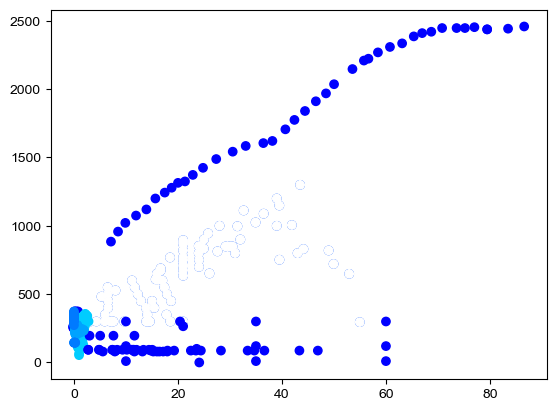

In [93]:
plt.scatter(data0['P (GPa)'],data0['T (K)'],cmap=phase_colors, c= data0['PhaseLabel'])

logistic regression

In [96]:
X = data0[['P (GPa)','T (K)']]
# degree = 2
# X_poly = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X)
y = data0['PhaseLabel']

In [98]:
# X = pb_data[['P','T']]
# y = pb_data['Phase']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [102]:
degrees = [1,2,3]
X_train_poly_dict = {}
X_test_poly_dict = {}
l1_scores = {}

In [104]:
# grid1 = [{'penalty': ['l2']
#          ,'class_weight': ['balanced', None]
#          ,'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
#          ,'solver':['newton-cg', 'sag', 'saga','lbfgs']
#          ,'multi_class':['multinomial']}]

In [106]:
# grid2 = [{'penalty': ['l2']
#          ,'class_weight': ['balanced', None]
#          ,'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
#          ,'solver':['liblinear']
#          ,'multi_class':['ovr']}]

In [108]:
# grid3 = [{'penalty': ['l1']
#          ,'class_weight': ['balanced', None]
#          ,'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
#          ,'solver':['saga']
#          ,'multi_class':['multinomial']}]

In [110]:
# grid4 = [{'penalty': ['l1']
#          ,'class_weight': ['balanced', None]
#          ,'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
#          ,'solver':[ 'liblinear', 'saga']
#          ,'multi_class':['ovr']}]

In [112]:
grid1 = [{'penalty': ['l1','l2']
         ,'class_weight': ['balanced', None]
         ,'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
         ,'solver':['liblinear']
         ,'multi_class':['ovr']}]

# grid2 = [{'penalty': ['l1','l2']
#          ,'class_weight': ['balanced', None]
#          ,'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
#          ,'solver':['saga']
#          ,'multi_class':['ovr','multinomial']}]

# grid3 = [{'penalty': ['l2']
#          ,'class_weight': ['balanced', None]
#          ,'C': [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4]
#          ,'solver':['newton-cg', 'sag','lbfgs']
#          ,'multi_class':['ovr','multinomial']}]

In [114]:
# i = 0
# for grid in tuned_params:
#     for degree in degrees:
#         X_train_poly_dict[degree] = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X_train)
#         X_test_poly_dict[degree] = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X_test)

#         print()
#         print(degree)
#         print()

#         for score in scores:
#             print("# Tuning hyper-parameters for %s" % score)
#             print()

#             clf = GridSearchCV(
#                 LogisticRegression(), grid, cv = 5, scoring='%s' % score
#             )
#             clf.fit(X_train_poly_dict[degree], y_train)

#             print("Best parameters set found on development set:")
#             print()
#             print(clf.best_params_)
#             best_params[i] = clf.best_params_
#             best_params[i] = clf.best_index_
#             best_degrees[i] = degree
#             print()
#     #         print("Grid scores on development set:")
#     #         print()
#     #         means = clf.cv_results_['mean_test_score']
#     #         stds = clf.cv_results_['std_test_score']
#     #         for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     #             print("%0.3f (+/-%0.03f) for %r"
#     #                   % (mean, std * 2, params))
#     #         print()
#     #         sparsity = np.mean(clf.coef_ == 0) * 100
#     #         print(sparsity)
#     #         print()

# #             print("Detailed classification report:")
# #             print()
# #             print("The model is trained on the full development set.")
# #             print("The scores are computed on the full evaluation set.")
# #             print()
#             y_true, y_pred = y_test, clf.predict(X_test_poly_dict[degree])
# #             print(classification_report(y_true, y_pred))
# #             print()
#             print('f1-micro:',f1_score(y_true, y_pred, average = 'macro'))


#             best_scores[i] = f1_score(y_true, y_pred, average = 'macro')

# #             y_score = clf.decision_function(X_test_poly_dict[degree])
            
# #             fpr, tpr, _ = roc_curve(y_test, y_score[:,1], pos_label = 1)
# #             #print(roc_auc_score(y_true, y_score, average='macro',multi_class ='ovr'))
# #             plt.plot(fpr, tpr, label = degree)
# #             plt.legend()
            
#             i = i + 1
#             print(i)
#         #l1_scores = {}

In [116]:
tuned_params = [grid1]
best_params = {}
best_scores = {}
best_degrees = {}

In [118]:
scores = ['macro','micro']

In [120]:
i = 0
for score in scores:
    best_scores[score] = []
    best_params[score] = []
    best_degrees[score] = []
    for grid in tuned_params:
        for degree in degrees:
            X_train_poly_dict[degree] = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X_train)
            X_test_poly_dict[degree] = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X_test)

            print()
            print(degree)
            print()

            print("# Tuning hyper-parameters for f1_%s" % score)
            print()

            clf = GridSearchCV(
                    LogisticRegression(random_state=0), grid, cv = 5, scoring='f1_%s' % score
                )
            clf.fit(X_train_poly_dict[degree], y_train)

            print("Best parameters set found on development set:")
            print()
            print(clf.best_params_)
            best_params[score].append(clf.best_params_)
            #best_scores[score].append(clf.best_score_)
            best_degrees[score].append(degree)
#             print()
#             print("Grid scores on development set:")
#             print()
#             means = clf.cv_results_['mean_test_score']
#             stds = clf.cv_results_['std_test_score']
#             for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#                     print("%0.3f (+/-%0.03f) for %r"
#                           % (mean, std * 2, params))
#             print()
#             sparsity = np.mean(clf.coef_ == 0) * 100
#             print(sparsity)
#             print()

    #             print("Detailed classification report:")
    #             print()
    #             print("The model is trained on the full development set.")
    #             print("The scores are computed on the full evaluation set.")
    #             print()
            y_true, y_pred = y_test, clf.predict(X_test_poly_dict[degree])
    #             print(classification_report(y_true, y_pred))
    #             print()
            print('f1-score:',f1_score(y_true, y_pred, average = '%s' %score))

            best_scores[score].append( f1_score(y_true, y_pred, average  = '%s' %score))
            #best_scores[i] = f1_score(y_true, y_pred, average = 'macro')

    #             y_score = clf.decision_function(X_test_poly_dict[degree])

    #             fpr, tpr, _ = roc_curve(y_test, y_score[:,1], pos_label = 1)
    #             #print(roc_auc_score(y_true, y_score, average='macro',multi_class ='ovr'))
    #             plt.plot(fpr, tpr, label = degree)
    #             plt.legend()

            i = i + 1
            print(i)
            #l1_scores = {}


1

# Tuning hyper-parameters for f1_macro

Best parameters set found on development set:

{'C': 1.0, 'class_weight': 'balanced', 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
f1-score: 0.5499015233478619
1

2

# Tuning hyper-parameters for f1_macro

Best parameters set found on development set:

{'C': 10000.0, 'class_weight': 'balanced', 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
f1-score: 0.6197218752127212
2

3

# Tuning hyper-parameters for f1_macro

Best parameters set found on development set:

{'C': 0.0001, 'class_weight': 'balanced', 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
f1-score: 0.6156810205442771
3

1

# Tuning hyper-parameters for f1_micro

Best parameters set found on development set:

{'C': 100.0, 'class_weight': 'balanced', 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}
f1-score: 0.5986394557823129
4

2

# Tuning hyper-parameters for f1_micro

Best parameters set found on development set:

{'C': 10

In [122]:
np.array(best_scores[score]).argmax()

2

In [124]:
best_scores[score]

[0.5986394557823129, 0.7278911564625851, 0.7346938775510204]

In [126]:
best_idx = 0

In [128]:
best_params[score][best_idx]

{'C': 100.0,
 'class_weight': 'balanced',
 'multi_class': 'ovr',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [130]:
best_degrees[score][best_idx]

1

(0.75, 0.88)

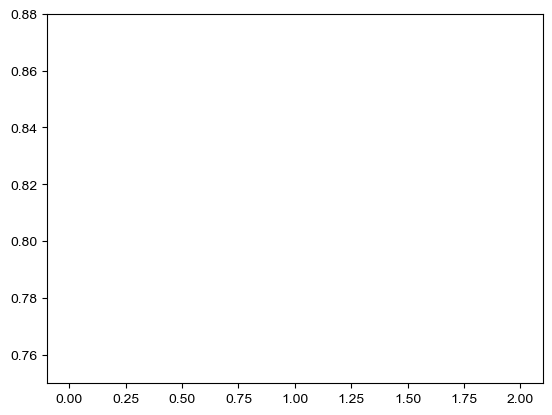

In [277]:
plt.plot(best_scores['macro'])
plt.plot(best_scores['micro'])
plt.ylim(0.75,0.88)

In [279]:
X = pb_data[['P','T']]
degree = 1
X_poly = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X)
Y = pb_data['Phase']

NameError: name 'pb_data' is not defined

In [281]:
model = LogisticRegression(C =10, class_weight =None, multi_class = 'ovr', penalty = 'l1', solver = 'liblinear')
#model = LogisticRegressionCV(class_weight ='balanced', multi_class = 'ovr', penalty = 'l1', solver = 'liblinear')
modelfit = model.fit(X_poly, Y)

NameError: name 'X_poly' is not defined

In [ ]:
sparsity = np.mean(modelfit.coef_ == 0) * 100
print(sparsity)

In [ ]:
modelfit.coef_

In [ ]:
pv, tv = np.meshgrid(np.linspace(12, 28, 100,endpoint=True), np.linspace(300, 2800, 100,endpoint=True))

In [ ]:
X_pred = np.c_[pv.ravel(), tv.ravel()]
X_pred_poly = PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X_pred)

In [ ]:
Y_hat = modelfit.predict(X_pred_poly)
Y_proba_hat = modelfit.predict_proba(X_pred_poly)

In [ ]:
from matplotlib import ticker, cm
wd_c = ['#d1495b']
rw_c = ['#00798c']
pv_c = ['#edae49']

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
newcolors = np.array(['#d1495b',
                      '#00798c',
                      '#edae49'
])
#cm.Paired([3,1,2])
phase_colors= ListedColormap(newcolors, name='mg2sio4')

In [ ]:
from matplotlib.legend_handler import HandlerTuple

In [ ]:
cm_scale = 1/2.54

ms = 20
ms_old = 10
ac_old = 0.6
lw = 1
lw_old = 0.8

from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(19*2/3*cm_scale, 10*cm_scale),dpi=300)
axes = []
gs0 = GridSpec(1,1,bottom=0.1, top=0.9, left=0.35, right=0.95, hspace=0.05, wspace=0.3)

axes.append(fig.add_subplot(gs0[0]))




################
#phase diagram#
################

axes[0].pcolormesh(pv, tv, Y_hat.reshape(pv.shape), cmap=phase_colors,alpha = 1)
# ax2.plot(p_adiabat1, t_adiabat1, 'r')
axes[0].contour(pv, tv, Y_hat.reshape(pv.shape), levels =[0.000001,1,2,3], colors = 'k',alpha = 1, linestyles = '-')

axes[0].contour(pv, tv, Y_proba_hat[:,0].reshape(pv.shape), levels =[0.75], colors = 'k',alpha = 0.5, linestyles = ':')
axes[0].contour(pv, tv, Y_proba_hat[:,1].reshape(pv.shape), levels =[0.75], colors = 'k',alpha = 0.5, linestyles = ':')
axes[0].contour(pv, tv, Y_proba_hat[:,2].reshape(pv.shape), levels =[0.75], colors = 'k',alpha = 0.5, linestyles = ':')

axes[0].scatter( pb_data_1.values[:, 0], pb_data_1.values[:, 2],c=pb_data_1.values[:, 1]
            , edgecolors='k', s = ms, lw = lw_old,cmap=phase_colors, marker = 's',alpha = ac_old)
axes[0].scatter( pb_data_dong.values[:, 0], pb_data_dong.values[:, 1],c=pb_data_dong.values[:, 2]
            , edgecolors='k', s = ms, lw = lw,cmap=phase_colors, marker = 'o')
axes[0].set_xlim(13.5, 26.5)
axes[0].set_ylim(1300, 2800)
axes[0].tick_params(labelsize=8)
axes[0].minorticks_on()
axes[0].tick_params(direction='in')
axes[0].tick_params(direction='in',which="minor")
# ax1.set_xticks([18,20,22,24,26])
# axes[0].set_yticks([1600,2000,2400,2800])
axes[0].set_xlabel('Pressure (GPa)',fontsize=8, labelpad=5)
axes[0].set_ylabel('Temperature (K)',fontsize=8, labelpad=5)

for x in range(0, len(minerals[0])):
    lines = axes[0].contour(pp,tt,minerals_array[x],[1], 
            colors = 'k',
            linewidths = 0.8, alpah = 0.5, linestyles = ':')


axes[0].text(18,2700,'Mg$_{\mathregular{2}}$SiO$_{\mathregular{4}}$',fontsize=10,ha="center",va="center",color='k',rotation=0, weight='bold'
            ,bbox=dict(boxstyle="square,pad=0.1", fc='w', ec="w", lw=1, alpha = 1))    

axes[0].text(18,2000,'wd',fontsize=8,ha="center",va="center",color=wd_c[0],rotation=0, weight='bold'
            ,bbox=dict(boxstyle="square,pad=0.1", fc='w', ec="w", lw=1, alpha = 1))    
axes[0].text(21,1500,'rw',fontsize=8,ha="center",va="center",color=rw_c[0],rotation=0, weight='bold'
            ,bbox=dict(boxstyle="square,pad=0.1", fc='w', ec="w", lw=1, alpha = 1))    
axes[0].text(25,2600,'bdg+per',fontsize=8,ha="center",va="center",color=pv_c[0],rotation=0, weight='bold'
            ,bbox=dict(boxstyle="square,pad=0.1", fc='w', ec="w", lw=1, alpha = 1))    


black_s1, = plt.plot([], [], mfc=wd_c[0],marker='s',mec='k',markersize=5,ls='',alpha = ac_old-0.2)
black_s2, = plt.plot([], [], mfc=rw_c[0],marker='s',mec='k',markersize=5,ls='',alpha = ac_old-0.2)
black_s3, = plt.plot([], [], mfc=pv_c[0],marker='s',mec='k',markersize=5,ls='',alpha = ac_old-0.2)
black_c1, = plt.plot([], [], mfc=wd_c[0],marker='o',mec='k',markersize=5,ls='')
black_c2, = plt.plot([], [], mfc=rw_c[0],marker='o',mec='k',markersize=5,ls='')
black_c3, = plt.plot([], [], mfc=pv_c[0],marker='o',mec='k',markersize=5,ls='')

import matplotlib.patches as mpatches
patch_dotted = mpatches.Patch(color ='k', lw = 0, fill=False, hatch= '.....')
black_l, = plt.plot([], [], color='k',lw= 1,ls='-')
black_l_1, = plt.plot([], [], color='k',lw= 1,ls=':', alpha = 0.5)
black_l_2, = plt.plot([], [], color='k',lw= 1,ls='--')

s1, = plt.plot([], [], mfc=wd_c[0],marker='s',mec='none',markersize=4,ls='')
s2, = plt.plot([], [], mfc=rw_c[0],marker='s',mec='none',markersize=4,ls='')
s3, = plt.plot([], [], mfc=pv_c[0],marker='s',mec='none',markersize=4,ls='')

leg1= plt.legend([(s1,s2,s3), black_l, black_l_1, black_l_2]
           , ["phase stability", "phase boundary","uncertainty","probability curve"],
          frameon=False,fontsize=8
                , bbox_to_anchor=(1.05, 0.50)
                ,handler_map={tuple: HandlerTuple(ndivide=None)}
                ,title = "Logistic regression\n(this study)")

# leg2= plt.legend([patch_dotted]
#            , ["phase boundary"],
#           frameon=False,fontsize=8
#                 , bbox_to_anchor=(1.03, 0.34)
#                 ,handler_map={tuple: HandlerTuple(ndivide=None)}
#                 ,title = "Thermodynamic calculation\n(this study)")

leg3= plt.legend([(black_c1,black_c2,black_c3), (black_s1,black_s2,black_s3)]
           , [("phase stability\n(this study)"), ("phase stability\n(literature data)")],
               frameon=False,fontsize=8
                , bbox_to_anchor=(1.04, 0.317)
                ,handler_map={tuple: HandlerTuple(ndivide=None)}
                ,title = "Experimental observation")

leg1.get_title().set_fontsize('8')
# leg2.get_title().set_fontsize('8')
leg3.get_title().set_fontsize('8')
plt.setp(leg1.get_title(), multialignment='center')
# plt.setp(leg2.get_title(), multialignment='center')
plt.setp(leg3.get_title(), multialignment='center')

plt.setp(leg1.get_texts(), multialignment='center')
# plt.setp(leg2.get_texts(), multialignment='center')
plt.setp(leg3.get_texts(), multialignment='center')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)
plt.gca().add_artist(leg3)

fig.text(0.235,0.9,'a',fontsize=8,ha="center",va="center",color='k',rotation=0, weight='bold')
fig.text(0.235,0.6,'b',fontsize=8,ha="center",va="center",color='k',rotation=0, weight='bold')
fig.text(0.235,0.3,'c',fontsize=8,ha="center",va="center",color='k',rotation=0, weight='bold')
fig.text(0.965,0.9,'d',fontsize=8,ha="center",va="center",color='k',rotation=0, weight='bold')

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=None)
fig.savefig('logit_pd.png', bbox_inches = "tight")